# <b>Exploratory  Data Analysis on Superestore</b>

Import the required libraries for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset in the pandas

In [2]:
dataset = pd.read_csv('Superstore_USA_CSV.csv')
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,5/28/2012,5/30/2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/7/2010,7/8/2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,7/27/2011,7/27/2011,998.2023,8,1446.67,88523


Check the info about dataset means amount of rows and cols

In [3]:
dataset.shape

(9426, 24)

First all of Data cleaning:<br>Cheach the amount of null vaule in the dataset.

In [21]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

Fill the null values with avg value in the column.

In [ ]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,5/28/2012,5/30/2012,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/7/2010,7/8/2010,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,7/27/2011,7/27/2011,998.202300,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,5/14/2013,5/15/2013,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,5/14/2013,5/14/2013,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,9/12/2013,9/14/2013,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2/8/2010,2/11/2010,349.485000,5,506.50,87530


Find the urgent orders: <br> Find the amount urgent orders to delivered?

In [15]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')
order_priority_counts = dataset['Order Priority'].value_counts()
order_priority_counts

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

We find the issue in the Critical columns. let's fix it.

In [16]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

Let's Create the pie chart to show the result of urgent orders.

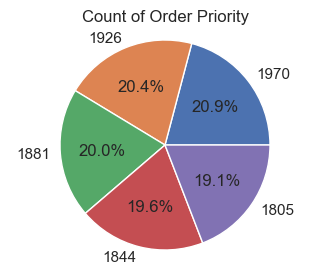

In [ ]:
plt.figure(figsize=(4,3))
sns.set_theme(style='whitegrid')

plt.pie(
    order_priority_counts,
    labels=order_priority_counts,
    autopct='%1.1f%%'
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.savefig("Count of Order Priority")
plt.title('Count of Order Priority')
plt.show()

# We can aslo create this chart with pandas
# order_priority_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)

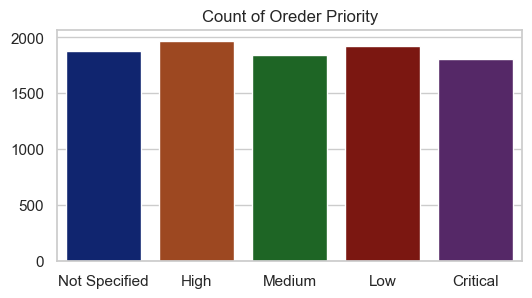

In [ ]:
dataset['Order Priority']=dataset['Order Priority'].replace('Critical ','Critical')
plt.figure(figsize=(6,3))

sns.countplot(
    x='Order Priority',
    data=dataset,
    palette='dark',
    hue=dataset['Order Priority']
)
plt.title('Count of Oreder Priority')

plt.savefig("Count of oreder priority")
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

Now We have to analysis of ship mode column to find, Two insights <br>
(1) We have to find, How many modes of shipping?<br>
(2) We have to find,The majority of customers belong In which country?


In [92]:
category_of_shipping_mode = dataset['Ship Mode'].value_counts()
category_of_shipping_mode

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

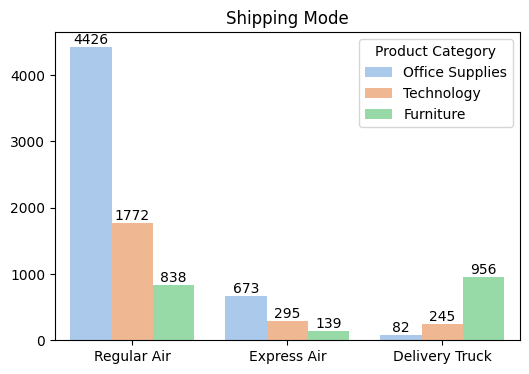

In [7]:
# Create the countplot 
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Ship Mode',
    data=dataset,
    palette='pastel',
    hue='Product Category',
)
# Use ax.bar_label() to add the count labels on each bar
for container in ax.containers:
    ax.bar_label(container) 

plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.title("Shipping Mode")

plt.savefig("Ship_mode")
plt.show()

<b>Customer Segment chart </b>

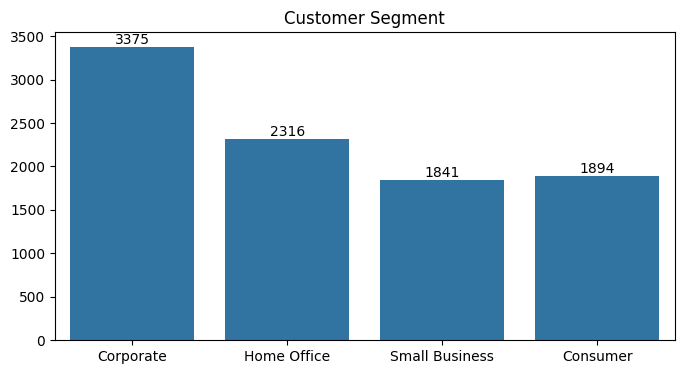

In [14]:
plt.figure(figsize=(8,4))
vaules_of_chart = sns.countplot(x='Customer Segment',
                   data=dataset)

for x in vaules_of_chart.containers:
    vaules_of_chart.bar_label(x)

plt.title("Customer Segment")
plt.savefig('Customer Segment')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

To find the total category of each product

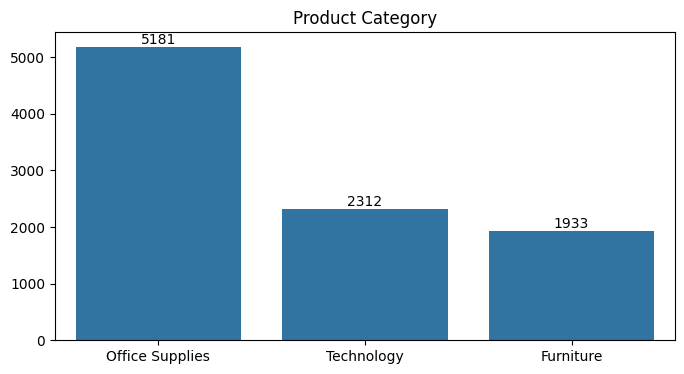

In [17]:
plt.figure(figsize=(8,4))
values = sns.countplot(
    x='Product Category',
    data=dataset,
   
)

for x in values.containers:
    values.bar_label(x)

plt.title('Product Category')
plt.savefig("Product Category")

plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)

plt.show()

Now find the each group of product sub-category

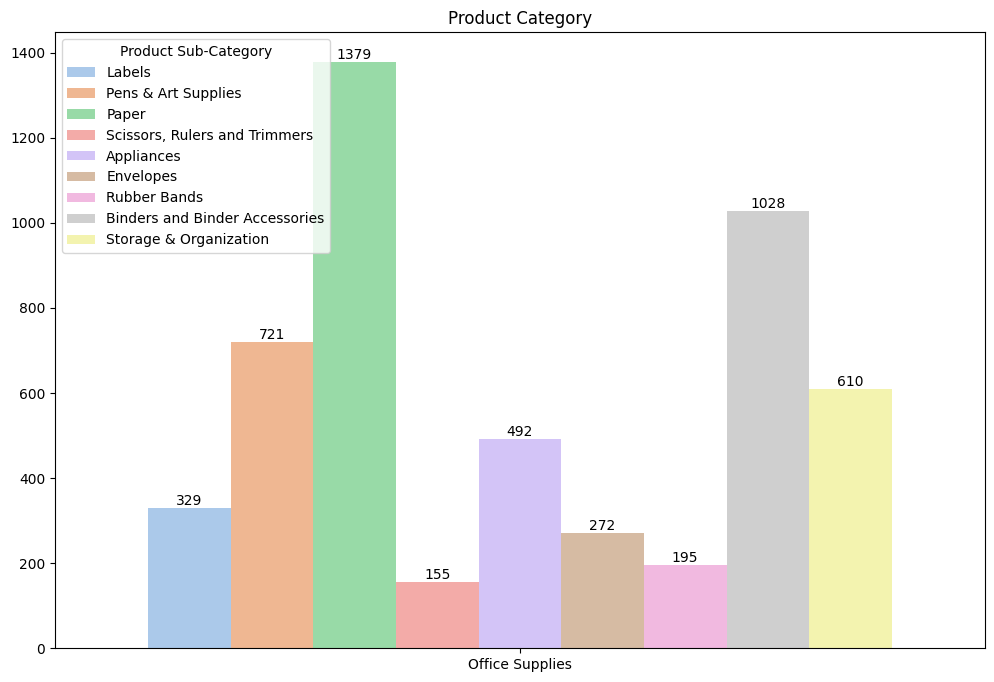

In [15]:
plt.figure(figsize=(12,8))
values = sns.countplot(
    x='Product Category',
    data=dataset[dataset['Product Category']=='Office Supplies'],
    palette='pastel',
    hue='Product Sub-Category'
)

for x in values.containers:
    values.bar_label(x)

plt.title('Product Category')
plt.savefig("Product Category")

plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)

plt.show()

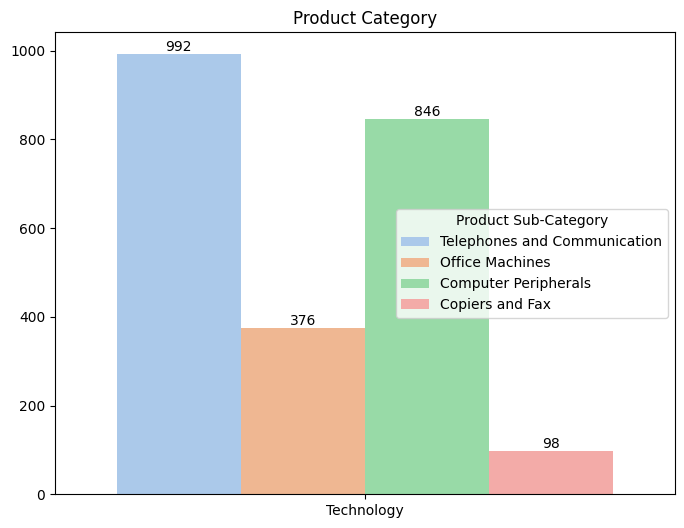

In [24]:
plt.figure(figsize=(8,6))
values = sns.countplot(
    x='Product Category',
    data=dataset[dataset['Product Category']=='Technology'],
    palette='pastel',
    hue='Product Sub-Category'
)

for x in values.containers:
    values.bar_label(x)

plt.title('Product Category')
plt.savefig("Product Category")

plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)

plt.show()

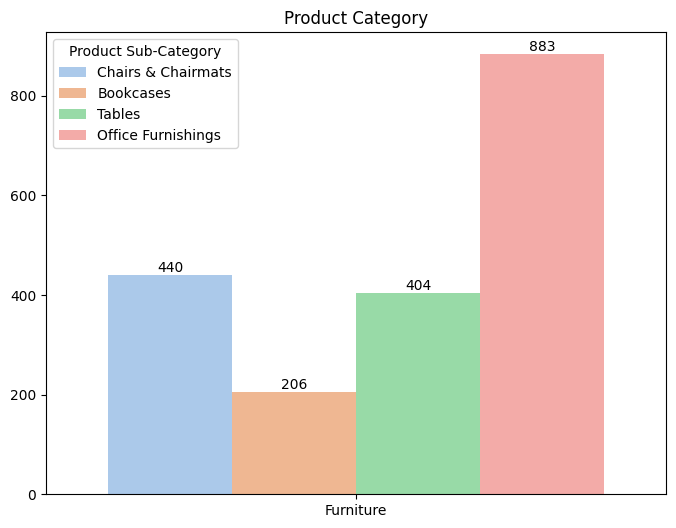

In [23]:
plt.figure(figsize=(8,6))
values = sns.countplot(
    x='Product Category',
    data=dataset[dataset['Product Category']=='Furniture'],
    palette='pastel',
    hue='Product Sub-Category'
)

for x in values.containers:
    values.bar_label(x)

plt.title('Product Category')
plt.savefig("Product Category")

plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)

plt.show()

Here is we going to find How much orders each year.we start info funtion to know about dataset and datatypes

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9354 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

Here we find, the datatype of order date and ship date is not datetime so first all of we have to change the datatype of these two column and create new column named order year in that we shore the data of years.

In [3]:
dataset['Order Date'] = dataset['Order Date'].astype('datetime64[ns]')
dataset['Ship Date'] = dataset['Ship Date'].astype('datetime64[ns]')

dataset['Order_Year'] = dataset['Order Date'].dt.year

Now we going to check info again the dataset and check datatypes and new column is created or not.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

Yes here is new column created for analysis now let's find How much sales each year.

In [9]:
d=dataset['Order_Year'].value_counts()

Here we find sales are increasing each year let's make a chart for it.

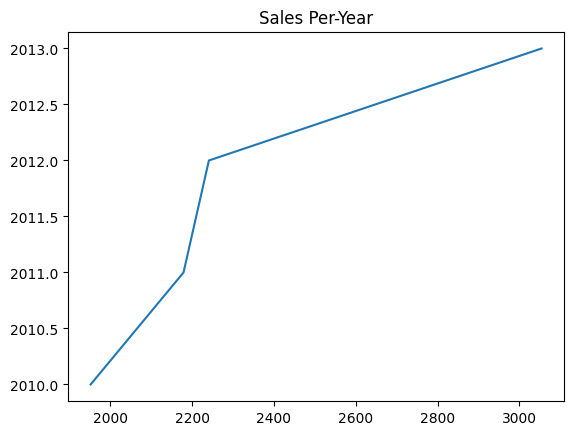

In [13]:
plt.title("Sales Per-Year")
sns.lineplot(x=d, y=dataset['Order_Year'])
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

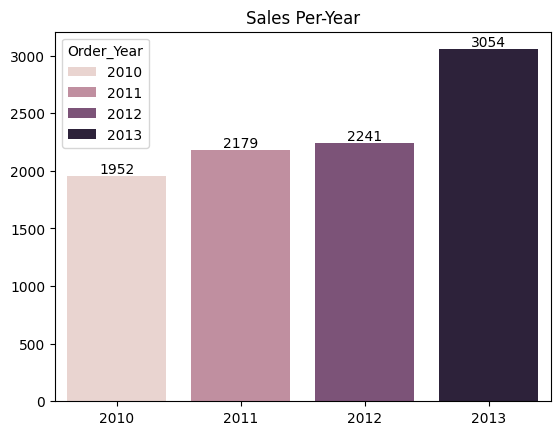

In [28]:
ax = sns.countplot(
    x=dataset['Order_Year'],
    data=dataset,
    hue=dataset['Order_Year']
)
for x in ax.containers:
    ax.bar_label(x)

plt.title("Sales Per-Year")
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.savefig("Sales Per-Year")
plt.show()

Let's Find the profit by product category

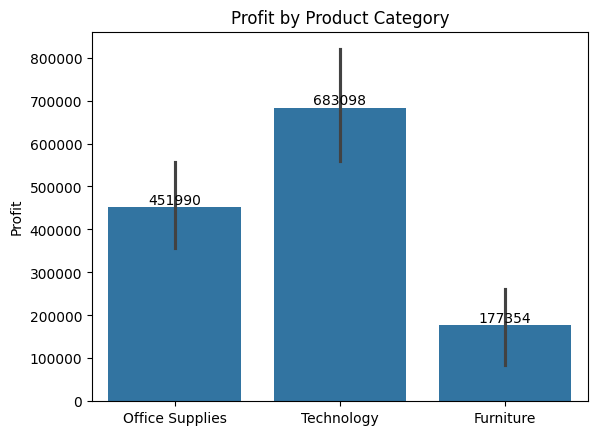

In [35]:
data = sns.barplot(
    x='Product Category',
    y='Profit',
    data=dataset,
    estimator='sum'
)
for x in data.containers:
    data.bar_label(x)

plt.title("Profit by Product Category")
plt.xlabel(xlabel=None)
plt.savefig("Profit By Product Category")
plt.show()

In [36]:
dataset.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Order_Year'],
      dtype='object')

Let's Find the total amount of sales in each state.

In [39]:
Total_sale_in_state = dataset.groupby('State or Province')['Sales'].sum()
Total_sale_in_state


State or Province
Alabama                  126706.80
Arizona                  120396.69
Arkansas                  96189.30
California              1161720.84
Colorado                 132210.00
Connecticut               42302.37
Delaware                   3543.45
District of Columbia     218868.62
Florida                  503609.51
Georgia                  196338.24
Idaho                     95642.15
Illinois                 667797.16
Indiana                  194081.59
Iowa                      88700.74
Kansas                   110586.51
Kentucky                  60760.51
Louisiana                 66611.20
Maine                     97120.51
Maryland                 124903.99
Massachusetts            228451.71
Michigan                 324593.62
Minnesota                190489.77
Mississippi               41918.27
Missouri                 113702.35
Montana                   29404.45
Nebraska                  40922.60
Nevada                    20028.43
New Hampshire             40830.05
Ne

Let's find the total amount of order in each state.

In [40]:
dataset['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
New Jersey               177
Colorado                 177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               